In [ ]:
!pip install hyperopt

In [2]:
import pickle
import numpy as np
from hyperopt import Trials
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Each model is stored in a Trials object from the hyperopt library. ChatGPT or the documentation can help you retrieve the information you need.

For each search algorithm, 200 models (hyperparameter combinations) were trained.

In [4]:
# Retrieving the trials
with open("rand_trials_200.bin", "rb") as f:
    rand_trials = pickle.load(f)

with open("tpe_trials_200.bin", "rb") as f:
    tpe_trials = pickle.load(f)

In [5]:
# Getting the best models for each algorithm
rand_best = min(rand_trials, key=lambda t: t['result']['loss'])
tpe_best = min(tpe_trials, key=lambda t: t['result']['loss'])

In [6]:
# Example of information saved in each trial (model):
rand_best

{'state': 2,
 'tid': 53,
 'spec': None,
 'result': {'loss': -0.7136968834339138,
  'status': 'ok',
  'hyperparameters': {'del_num_times': 0.0,
   'dropout': 0.1101374997984408,
   'l2': 6.336724645751509e-06,
   'learning_rate': 0.0003557400109264205,
   'model_size': (32,),
   'synonym_num_times': 1.0},
  'train_losses': [[2.299614171187083,
    2.2982757290204368,
    2.2970434427261353,
    2.2951273918151855,
    2.2932871182759604,
    2.29086971282959,
    2.288474182287852,
    2.2853762110074363,
    2.282190521558126,
    2.2786033948262534,
    2.2747117082277932,
    2.2701634963353476,
    2.265556971232096,
    2.2604082425435386,
    2.2546314001083374,
    2.249835252761841,
    2.243880053361257,
    2.2383588353792825,
    2.2318449219067893,
    2.225856383641561,
    2.2203078269958496,
    2.2134272853533425,
    2.2071948250134787,
    2.201148589452108,
    2.1972922881444297,
    2.1917627453804016,
    2.18590654929479,
    2.179501791795095,
    2.1772693792978

In [7]:
# Getting f1 scores for all models for each search algorithm
rand_f1 = - np.array(rand_trials.losses())
tpe_f1 = - np.array(tpe_trials.losses())

(array([64., 10., 14.,  4., 11., 26., 62.,  9.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

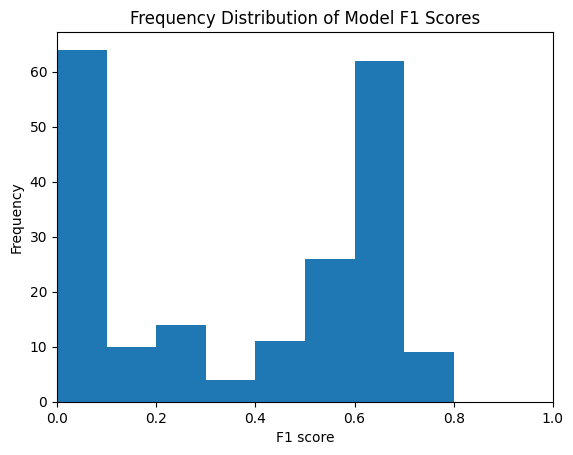

In [8]:
# Making a histogram of the f1 scores for the random search
plt.xlabel("F1 score")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Model F1 Scores")
plt.xlim(0, 1)
plt.hist(rand_f1 // 0.1 * 0.1, bins=[0.1 * i for i in range(11)])

(array([ 18.,   3.,  10.,   9.,   4.,  13., 102.,  41.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

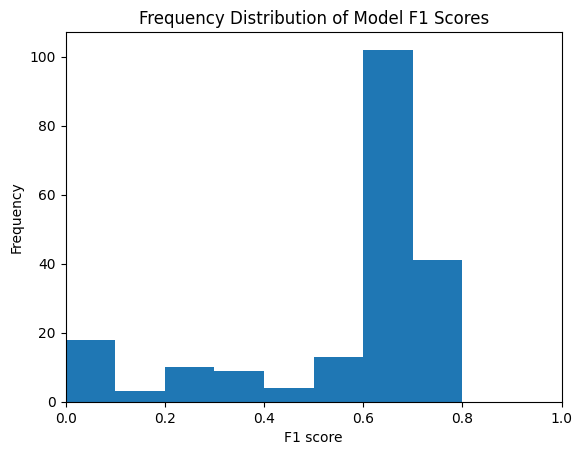

In [9]:
# Making a histogram of the f1 scores for the TPE search
plt.xlabel("F1 score")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Model F1 Scores")
plt.xlim(0, 1)
plt.hist(tpe_f1 // 0.1 * 0.1, bins=[0.1 * i for i in range(11)])